In [6]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *


In [28]:
import numpy as np
import pandas as pd

true_b = 1
true_w = 2

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
split = int(0.8*df.shape[0])
print(f"split = {split}")
X_train = df.iloc[:split, 1]
y_train = df.iloc[:split, 0]

X_test = df.iloc[split:, 1]
y_test = df.iloc[split:, 0]

X_train.shape

split = 1168


(1168,)

In [30]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1168,)
y_train shape: (1168,)
X_test shape: (292,)
y_test shape: (292,)


Text(0, 0.5, 'y')

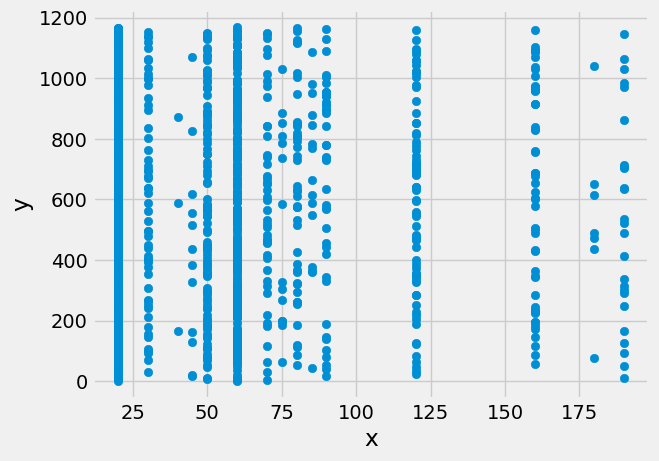

In [31]:
plt.scatter(X_train, y_train)
plt.xlabel('x')
plt.ylabel('y')

In [32]:
df.replace(['yes','no'],[1,0], inplace=True)


In [33]:
df.replace(['furnished','unfurnished','semi-furnished'],[1,0,2],inplace=True)

In [34]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)
    
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [35]:
import numpy as np

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    f_wb = w * x + b
    dj_dw = np.sum((f_wb - y) * x) / m
    dj_db = np.sum(f_wb - y) / m

    return dj_dw, dj_db


In [36]:
import numpy as np
import copy

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)  # Avoid modifying global w_in
    J_history = []  # An array to store cost J at each iteration for graphing later
    p_history = []  # An array to store parameter [w, b] at each iteration

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using the learning rate alpha
        b -= alpha * dj_db
        w -= alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b: {b}")

    return w, b, J_history, p_history


In [37]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 15000
tmp_alpha = 1.0e-10

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")


Iteration    0: Cost 227662.63874455617  dj_dw: -33349.85873287671, dj_db: -584.5   w: 3.334985873287671e-06, b: 5.8450000000000004e-08
Iteration 1500: Cost 227495.88145506693  dj_dw: -33324.714533533785, dj_db: -584.2160387279855   w: 0.005003926486602477, b: 8.771213602965544e-05
Iteration 3000: Cost 227329.37549738472  dj_dw: -33299.58929038123, dj_db: -583.9322915256938   w: 0.010000747780271015, b: 0.0001753232439364599
Iteration 4500: Cost 227163.12049269484  dj_dw: -33274.48298912798, dj_db: -583.6487582317377   w: 0.01499380170923478, b: 0.00026289180581875766
Iteration 6000: Cost 226997.11606275334  dj_dw: -33249.395615493755, dj_db: -583.365438684852   w: 0.01998309111370681, b: 0.00035041785375069417
Iteration 7500: Cost 226831.36182988645  dj_dw: -33224.32715520905, dj_db: -583.082332723893   w: 0.024968618831758948, b: 0.0004379014197822361
Iteration 9000: Cost 226665.8574169897  dj_dw: -33199.277594015104, dj_db: -582.7994401878386   w: 0.029950387699323212, b: 0.00052534

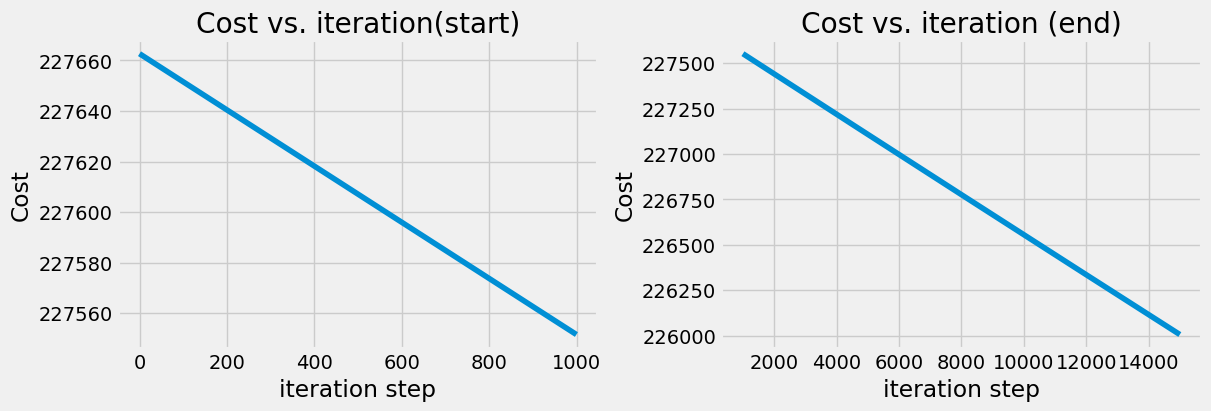

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [39]:
predicted = w_final * X_train + b_final


Text(0.5, 0, 'x')

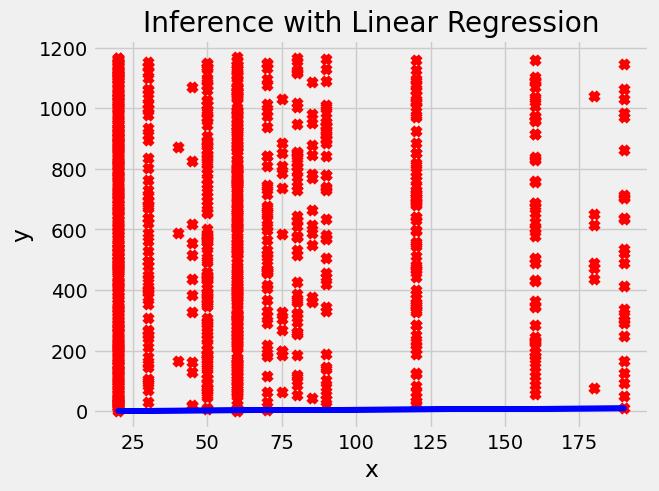

In [40]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

In [41]:
from sklearn.metrics import r2_score

r2_score(y_train,predicted)

-2.976002868144287